# 기본 세팅 준비준비

In [ ]:
## 1번 실행 -> 런타임 다시 시작 -> 2번 실행 -> 3번 실행

## 1번

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,257 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
## 2번

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

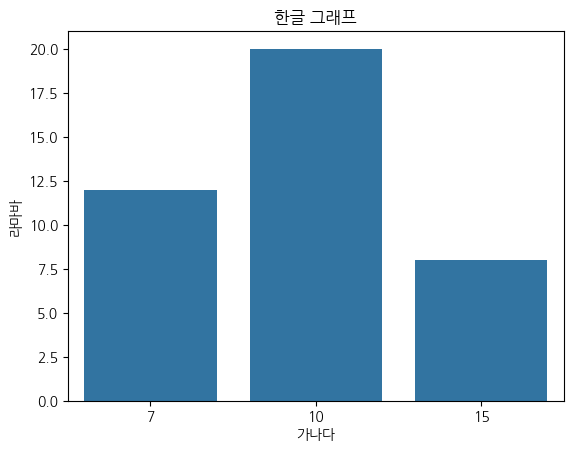

In [ ]:
## 3번

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 그래프 그리기 예시
data = {'가나다': [10, 15, 7], '라마바': [20, 8, 12]}
df = pd.DataFrame(data)
sns.barplot(data=df, x='가나다', y='라마바')
plt.title('한글 그래프')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


df = pd.read_pickle('/content/drive/MyDrive/반도체_캐글/LSWMD/LSWMD.pkl')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


# 불량 유형 비율

In [ ]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0, 'Donut':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Near-full':7, 'none':8}
mapping_traintest={'Training':0, 'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

In [ ]:
tol_wafers=df.shape[0] # 행 갯수 반환
tol_wafers

811457

In [ ]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)] # 새로운 데이터 프레임 생성
df_withlabel = df_withlabel.reset_index() # 앞에서 생성한 데이터 프레임의 인덱스 재설정
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)] # 새로운 데이터 프레임 생성
df_withpattern = df_withpattern.reset_index() # 데이터 프레임 인덱스 재설정
df_nonpattern = df[(df['failureNum']==8)] # 새로운 데이터 프레임 생성
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0] # 각 데이터 프레임 행 갯수 반환

(172950, 25519, 147431)

In [ ]:
# Count the total number of wafers
total_wafers = df.shape[0]

# Count the wafers with a mapped failureNum (which includes 'none' mapped to 8) -> failNum이 없는 것 찾기
wafers_with_mapped_failureNum = df[df['failureNum'].between(0, 8)].shape[0]

# Calculate wafers without a valid failureNum by difference
# This assumes there might be rows that didn't fit into the mapping, but based on your mapping, this shouldn't be the case.
wafers_without_failureNum = total_wafers - wafers_with_mapped_failureNum

print(f"Wafers without a valid failureNum: {wafers_without_failureNum}")


Wafers without a valid failureNum: 638507


<ipython-input-17-2ff60b1b919d>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)


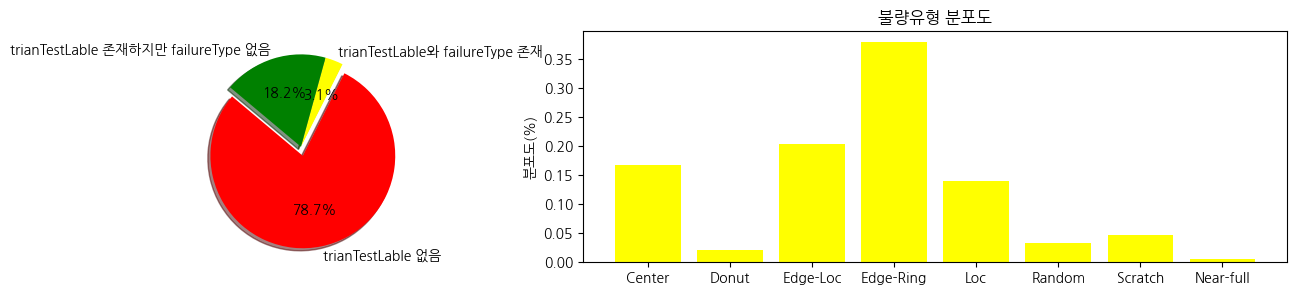

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
figure = plt.figure(figsize=(15,3))
gridspec = gridspec.GridSpec(1, 2, width_ratios=[1,2])
ax1 = plt.subplot(gridspec[0])
ax2 = plt.subplot(gridspec[1])

no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)
labels = ['trianTestLable 없음', 'trianTestLable와 failureType 존재', 'trianTestLable 존재하지만 failureType 없음']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2=['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='yellow', align='center', alpha=1)
ax2.set_title("불량유형 분포도")
ax2.set_ylabel("분포도(%)")
ax2.set_xticklabels(labels2)

plt.show()

# 다시 진행

In [ ]:
# 문제점 1) dieSize가 서로 다르다
# 문제점 2) lot당 waferindex가 25씩이어야하는데 그렇지않다.
# 문제점 3) trainTestlabel과 failureType이 없는 것이 존재한다.

In [ ]:
import pandas as pd

# Pandas 설정을 조정하여 생략 없이 최대 행을 출력하도록 합니다.
pd.set_option('display.max_rows', None)


# waferIndex 값으로 예상되는 집합을 정의합니다.
expected_waferindex = set(range(1, 26))

# 각 lotName의 waferIndex 열에 누락된 인덱스가 있는지 확인하는 함수입니다.
def missing_index(index):
    return sorted(list(expected_waferindex - set(index)))

# 'lotName'으로 그룹화하고 각 lot에 대해 누락된 인덱스를 찾기 위해 함수를 적용합니다.
missing_index_by_lot = df.groupby('lotName')['waferIndex'].apply(missing_index)

# 1부터 25까지 모든 인덱스를 가진 lot은 필터링하고, 누락된 인덱스가 있는 lot만 보여줍니다.
lots_with_missing_index = missing_index_by_lot[missing_index_by_lot.apply(len) > 0]

# 누락된 waferIndex 값을 가진 lotName을 출력합니다.
print(lots_with_missing_index)


lotName
lot10000    [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
lot10001    [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
lot10002    [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
lot10007                                                 [21]
lot10012    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...
lot10013    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2...
lot10014                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lot10015                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lot10016                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lot10017    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
lot10018    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
lot10019             [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
lot10020             [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
lot10021    [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
lot10022    [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
lot10023    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...


In [ ]:
# 공란 체크
def is_empty_list(lst):
    return len(lst) == 0

# 'trainTestLabel' 공란
empty_trainTestLabel_count = df['trianTestLabel'].apply(is_empty_list).sum()

# 'failureType' 공란
empty_failureType_count = df['failureType'].apply(is_empty_list).sum()

# Display the results
print("Empty 'trianTestLabel' count:", empty_trainTestLabel_count)
print("Empty 'failureType' count:", empty_failureType_count)


Empty 'trianTestLabel' count: 638507
Empty 'failureType' count: 638507


In [ ]:
# 빈 리스트를 확인하는 함수입니다.
def is_empty_list(lst):
    return len(lst) == 0

# trainTestLabel 또는 failureType 열이 빈 리스트인 행을 삭제합니다.
df_cleaned = df[~((df['trianTestLabel'].apply(is_empty_list)) | (df['failureType'].apply(is_empty_list)))]

# failureType 열이 빈 리스트인 행을 삭제합니다._2024.0414 수정
df_cleaned = df[df['failureType'].apply(is_empty_list)]


df_cleaned.shape # 확인을 위해 새로운 데이터프레임의 크기를 출력합니다.


In [ ]:
# 공란 체크
def is_empty_list(lst):
    return len(lst) == 0

# 'trainTestLabel' 공란
empty_trainTestLabel_count = df_cleaned['trianTestLabel'].apply(is_empty_list).sum()

# 'failureType' 공란
empty_failureType_count = df_cleaned['failureType'].apply(is_empty_list).sum()

# Display the results
print("Empty 'trianTestLabel' count:", empty_trainTestLabel_count)
print("Empty 'failureType' count:", empty_failureType_count)


Empty 'trianTestLabel' count: 638507
Empty 'failureType' count: 638507


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638507 entries, 35 to 811456
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        638507 non-null  object 
 1   dieSize         638507 non-null  float64
 2   lotName         638507 non-null  object 
 3   waferIndex      638507 non-null  float64
 4   trianTestLabel  638507 non-null  object 
 5   failureType     638507 non-null  object 
 6   failureNum      638507 non-null  object 
 7   trainTestNum    638507 non-null  object 
dtypes: float64(2), object(6)
memory usage: 43.8+ MB


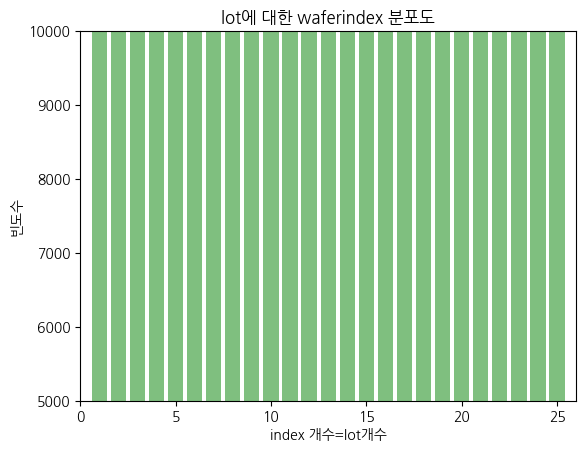

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

uni_Index=np.unique(df_cleaned.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='green', align='center', alpha=0.5)
plt.title("lot에 대한 waferindex 분포도")
plt.xlabel("index 개수=lot개수")
plt.ylabel("빈도수")
plt.xlim(0,26)
plt.ylim(5000,10000)
plt.show()

In [ ]:
df_cleaned.info() # 172950개가 trianTestLable와 failureType 존재함

df_cleaned=df_cleaned.drop(['waferIndex'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 638507 entries, 35 to 811456
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        638507 non-null  object 
 1   dieSize         638507 non-null  float64
 2   lotName         638507 non-null  object 
 3   waferIndex      638507 non-null  float64
 4   trianTestLabel  638507 non-null  object 
 5   failureType     638507 non-null  object 
 6   failureNum      638507 non-null  object 
 7   trainTestNum    638507 non-null  object 
dtypes: float64(2), object(6)
memory usage: 43.8+ MB


In [ ]:
def find_parameter(x):
    parameter0=np.size(x, axis=0)
    parameter1=np.size(x, axis=1)
    return parameter0, parameter1
df_cleaned['waferMap_parameter']=df.waferMap.apply(find_parameter)
df_cleaned.sample(20)

,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum,waferMap_parameter
197887,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3532.0,lot12621,[],[],[],[],"(64, 71)"
231009,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7810.0,lot14478,[],[],[],[],"(89, 112)"
492832,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",686.0,lot30466,[],[],[],[],"(31, 28)"
263316,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1922.0,lot16313,[],[],[],[],"(48, 51)"
47094,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",6295.0,lot3978,[],[],[],[],"(113, 71)"
430895,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9796.0,lot26106,[],[],[],[],"(122, 102)"
494170,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot30587,[],[],[],[],"(49, 39)"
523441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",515.0,lot32740,[],[],[],[],"(25, 27)"
581428,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",846.0,lot36311,[],[],[],[],"(33, 33)"
240617,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5095.0,lot14992,[],[],[],[],"(76, 85)"


In [ ]:
max(df_cleaned.waferMap_parameter), min(df_cleaned.waferMap_parameter)

((300, 202), (6, 21))

In [ ]:
import pandas as pd

# df_cleaned는 이미 있는 데이터프레임이라고 가정합니다.

# waferMap_parameter의 각 값의 개수를 확인
waferMap_counts = df_cleaned['waferMap_parameter'].value_counts()
print("waferMap_parameter의 각 값의 개수:")
print(waferMap_counts)

# waferMap_parameter 값에 따라 그룹화하고, 각 그룹에 대해 dieSize의 빈도를 계산
for parameter_value in df_cleaned['waferMap_parameter'].unique():
    # 특정 waferMap_parameter 값에 해당하는 행만 필터링
    subset = df_cleaned[df_cleaned['waferMap_parameter'] == parameter_value]

    # dieSize 열의 값의 개수를 계산
    dieSize_counts = subset['dieSize'].value_counts()
    print(f"\nwaferMap_parameter 값이 {parameter_value}인 경우의 dieSize 값과 개수:")
    print(dieSize_counts)



waferMap_parameter의 각 값의 개수:
waferMap_parameter
(32, 29)      108274
(25, 27)       45302
(49, 39)       39157
(33, 33)       23655
(30, 34)       17113
(26, 26)       15712
(52, 59)       14626
(31, 31)       14083
(39, 31)       13108
(33, 29)       12151
(64, 71)       11641
(31, 28)       10451
(35, 40)       10268
(44, 44)        8457
(51, 59)        7776
(212, 84)       7553
(38, 38)        6809
(34, 31)        6772
(72, 72)        5464
(56, 41)        5364
(39, 37)        5154
(40, 40)        4982
(87, 74)        4834
(45, 43)        4563
(18, 19)        4420
(89, 76)        4369
(64, 72)        4252
(86, 89)        3871
(89, 112)       3848
(88, 81)        3843
(74, 76)        3765
(75, 61)        3718
(54, 71)        3520
(51, 30)        3474
(41, 42)        3133
(63, 160)       3064
(50, 43)        2903
(66, 77)        2564
(29, 27)        2545
(36, 36)        2533
(63, 62)        2489
(35, 31)        2298
(88, 56)        2187
(57, 58)        2163
(37, 55)        2149
(22, 50

In [ ]:
uni_waferMap_parameter=np.unique(df_cleaned.waferMap_parameter, return_counts=True)
uni_waferMap_parameter[0].shape[0]

619

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638507 entries, 35 to 811456
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   waferMap            638507 non-null  object 
 1   dieSize             638507 non-null  float64
 2   lotName             638507 non-null  object 
 3   trianTestLabel      638507 non-null  object 
 4   failureType         638507 non-null  object 
 5   failureNum          638507 non-null  object 
 6   trainTestNum        638507 non-null  object 
 7   waferMap_parameter  638507 non-null  object 
dtypes: float64(1), object(7)
memory usage: 43.8+ MB


In [ ]:
df_cleaned['failureNum']=df_cleaned.failureType
df_cleaned['trainTestNum']=df_cleaned.trianTestLabel
mapping_type={'Center':0, 'Donut':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Near-full':7, 'none':8}
mapping_traintest={'Training':0, 'Test':1}
df_cleaned=df_cleaned.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

In [ ]:
df_cleaned_tol_wafers=df_cleaned.shape[0] # 행 갯수 반환
df_cleaned_tol_wafers


638507

In [ ]:
df_cleaned_withlabel = df_cleaned[(df_cleaned['failureNum']>=0) & (df_cleaned['failureNum']<=8)] # 새로운 데이터 프레임 생성 -> 불량넘버가 존재한것
df_cleaned_withlabel = df_cleaned_withlabel.reset_index() # 앞에서 생성한 데이터 프레임의 인덱스 재설정
df_cleaned_withpattern = df_cleaned[(df_cleaned['failureNum']>=0) & (df_cleaned['failureNum']<=7)] # 새로운 데이터 프레임 생성 -> 불량
df_cleaned_withpattern = df_cleaned_withpattern.reset_index() # 데이터 프레임 인덱스 재설정
df_cleaned_nonpattern = df_cleaned[(df_cleaned['failureNum']==8)] # 새로운 데이터 프레임 생성 -> 정상
df_cleaned_withlabel.shape[0], df_cleaned_withpattern.shape[0], df_cleaned_nonpattern.shape[0] # 각 데이터 프레임 행 갯수 반환

(0, 0, 0)

<ipython-input-26-89906ea824f0>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


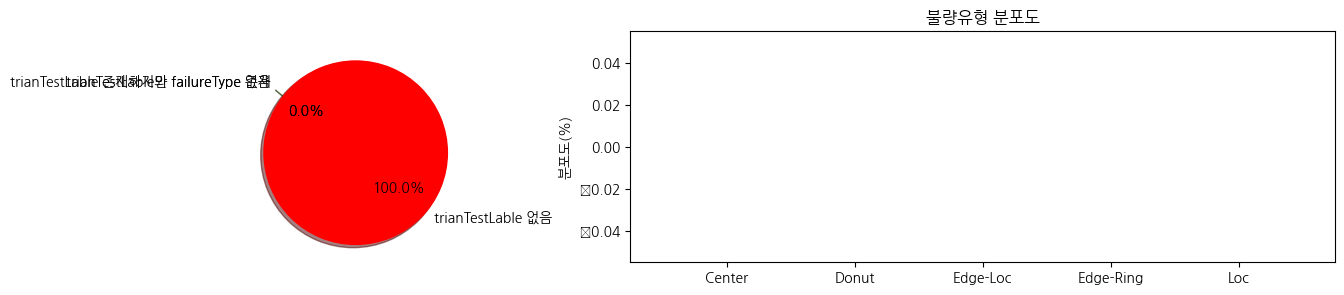

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
figure = plt.figure(figsize=(15,3))
gridspec = gridspec.GridSpec(1, 2, width_ratios=[1,2])
ax1 = plt.subplot(gridspec[0])
ax2 = plt.subplot(gridspec[1])

#no_wafers=[df_cleaned_tol_wafers-df_cleaned_withlabel.shape[0], df_cleaned_withpattern.shape[0], df_cleaned_nonpattern.shape[0]] 2024.04.14. 수정
no_wafers=[df_cleaned_tol_wafers-df_cleaned_withlabel.shape[0], df_cleaned_withpattern.shape[0], df_cleaned_nonpattern.shape[0]]

colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)
labels = ['trianTestLable 없음', 'trianTestLable와 failureType 존재', 'trianTestLable 존재하지만 failureType 없음']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

cleaned_uni_pattern=np.unique(df_cleaned_withpattern.failureNum, return_counts=True)
labels2=['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(cleaned_uni_pattern[0],cleaned_uni_pattern[1]/df_cleaned_withpattern.shape[0], color='yellow', align='center', alpha=1)
ax2.set_title("불량유형 분포도")
ax2.set_ylabel("분포도(%)")
ax2.set_xticklabels(labels2)

plt.show()

In [ ]:
# 현재 문제점 -> label과 type이 둘 다 존재한 파일만 따로 빼내야함

# 12

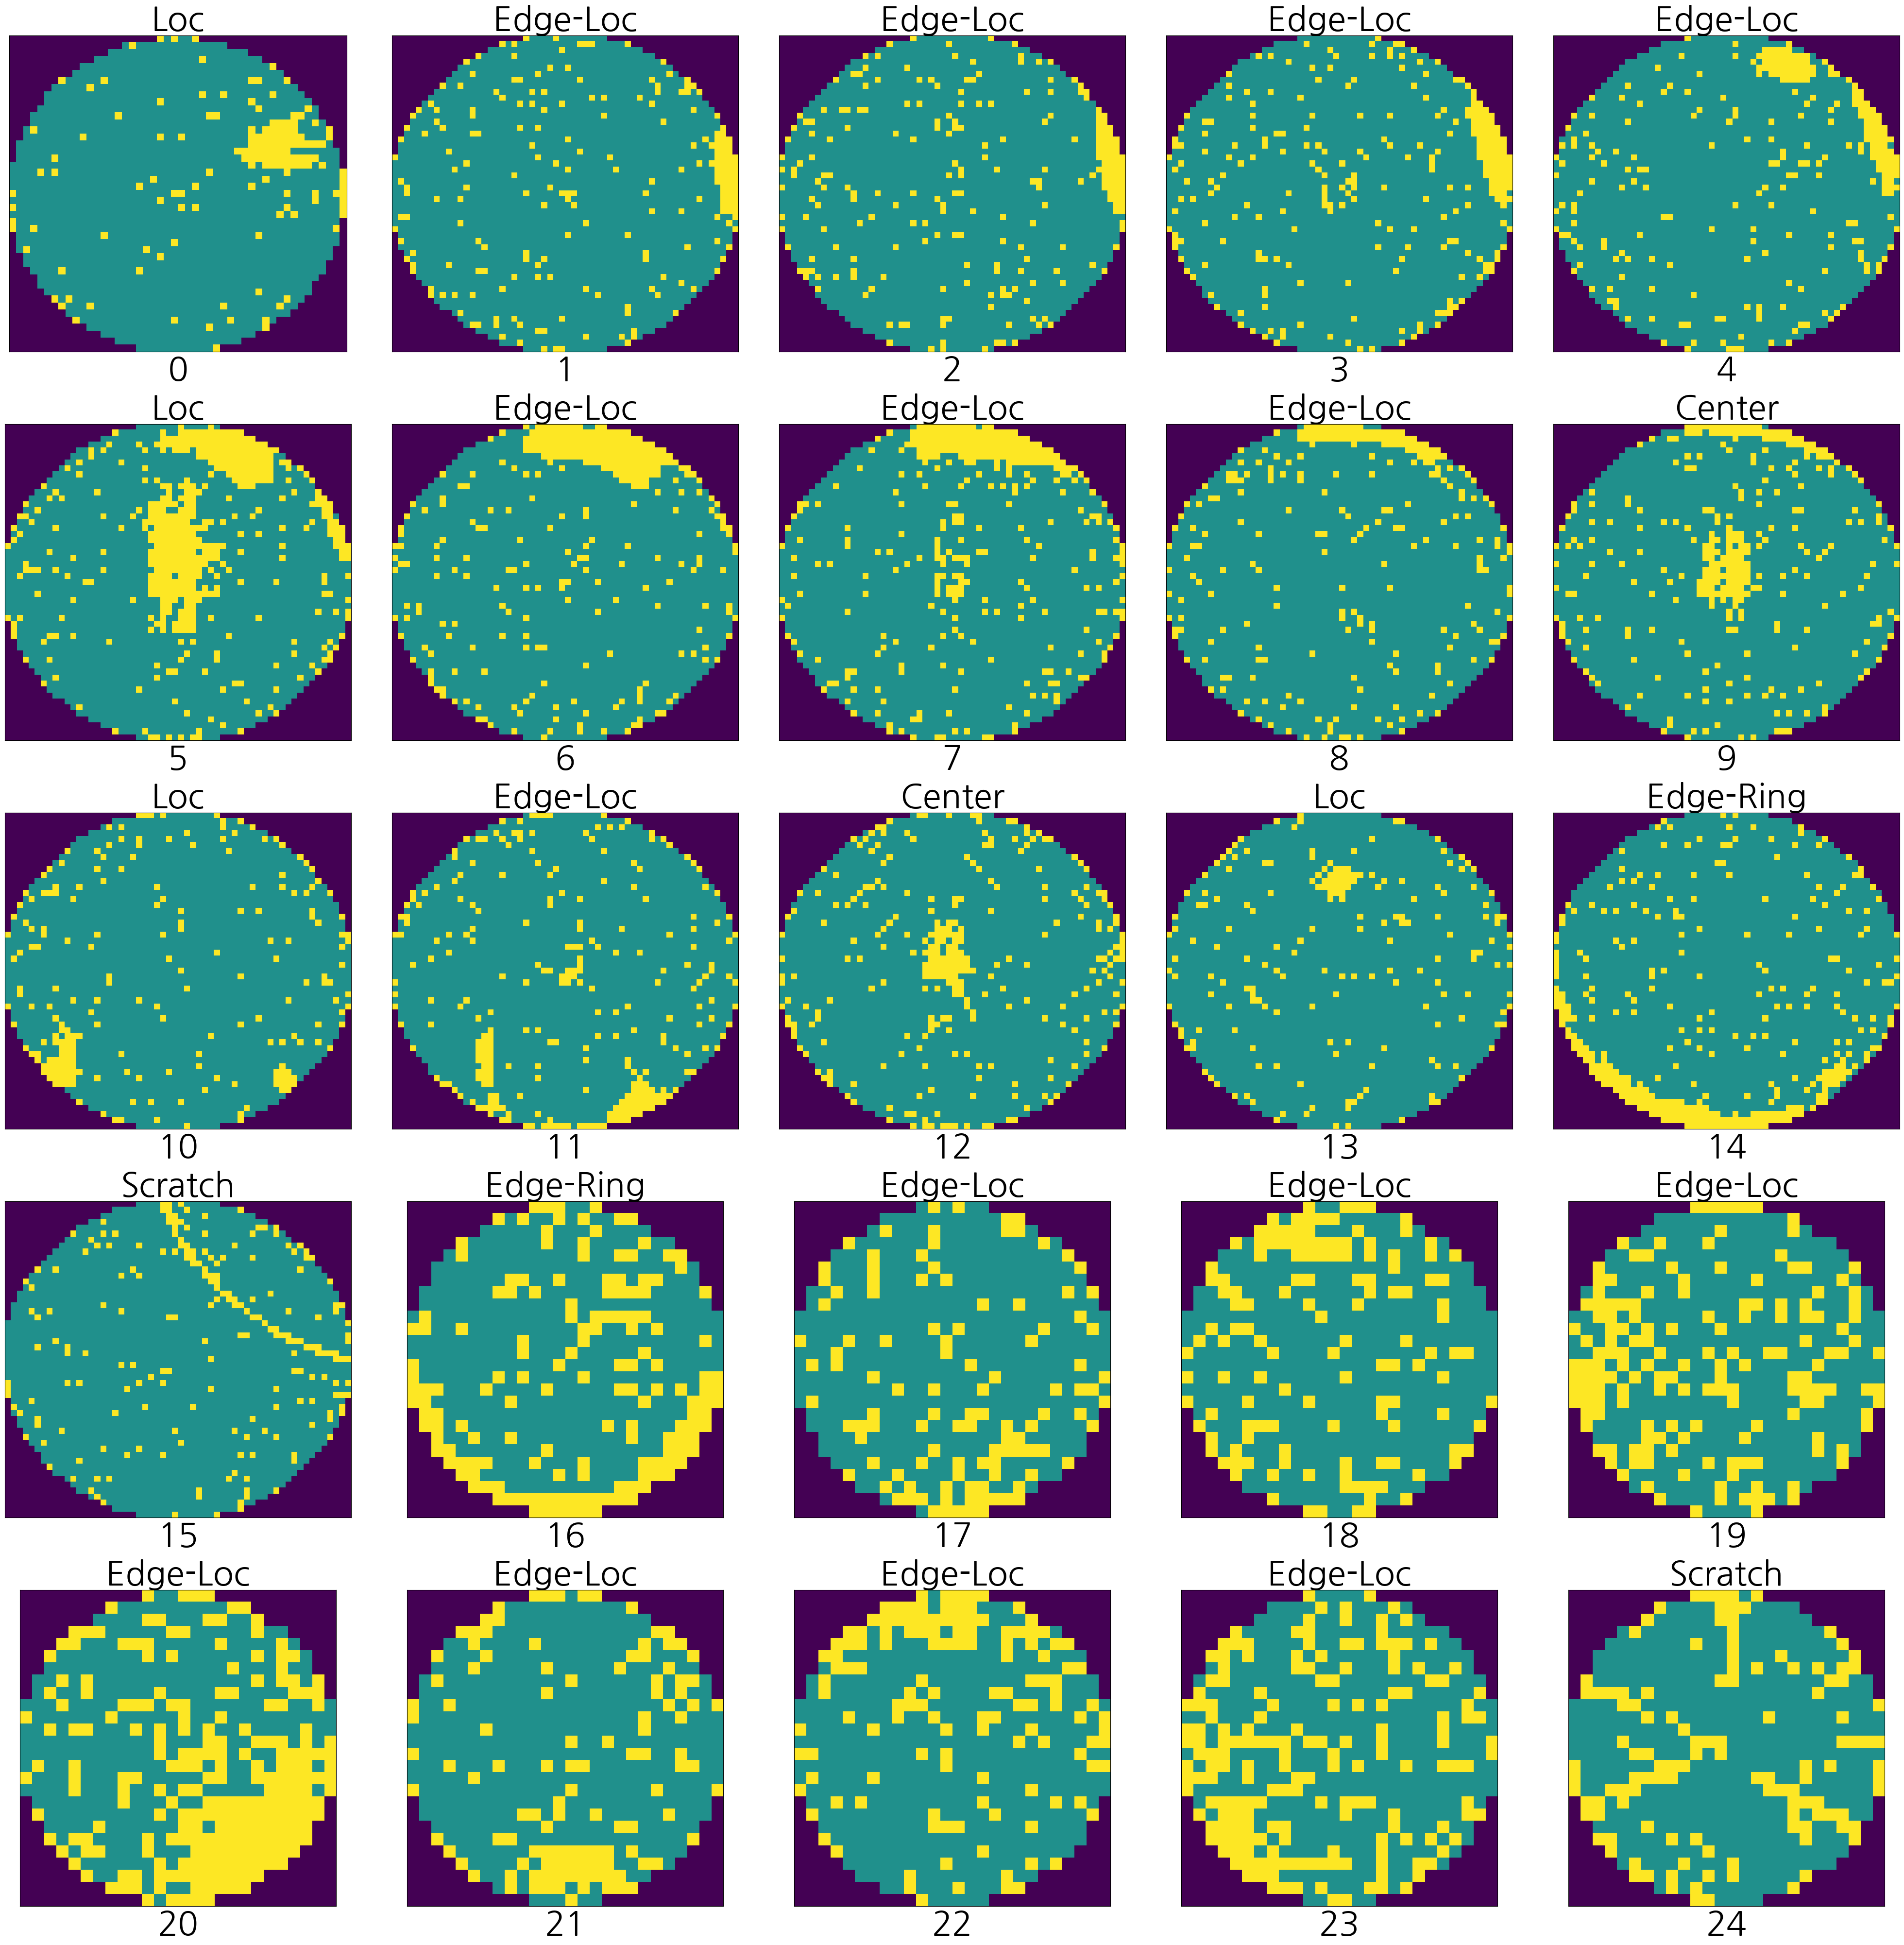

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize=(40, 40))
ax = ax.ravel(order='C')
for i in range(25):
    img = df_cleaned_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_cleaned_withpattern.failureType[i][0][0], fontsize=50)
    ax[i].set_xlabel(df_cleaned_withpattern.index[i], fontsize=50)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned_withlabel.info()
df_cleaned_withpattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172950 entries, 0 to 172949
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               172950 non-null  int64  
 1   waferMap            172950 non-null  object 
 2   dieSize             172950 non-null  float64
 3   lotName             172950 non-null  object 
 4   trianTestLabel      172950 non-null  object 
 5   failureType         172950 non-null  object 
 6   failureNum          172950 non-null  int64  
 7   trainTestNum        172950 non-null  int64  
 8   waferMap_parameter  172950 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 11.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25519 entries, 0 to 25518
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               25519 non-null  int64  
 1   waferMap         

In [ ]:
# failureNum value 개수파악
failureNum_counts = df_cleaned_withpattern['failureNum'].value_counts()

# failureNum 분류
failureNum_counts_sorted = failureNum_counts.sort_index()

# 결과
print(failureNum_counts_sorted)


0    4294
1     555
2    5189
3    9680
4    3593
5     866
6    1193
7     149
Name: failureNum, dtype: int64
